#### Dataset 2 preparation

In [ ]:
# Only read the first 4400 rows and specific columns
cols_to_use = ['label', 'comment', 'parent_comment']

df2 = pd.read_csv('../Dataset/train-balanced-sarcasm.csv', usecols=cols_to_use, nrows=4400)

# Rename columns
df2 = df2.rename(columns={
    'comment': 'response',
    'parent_comment': 'context'
})

# Save to CSV
df2.to_csv('../Dataset/sarcasm_detection_single_context_training_data.csv', index=False)
df2

,label,response,context
0,1,That's exactly what a country who made up a ho...,China Tells Trump That Climate Change Is No Ho...
1,1,but it still snows,Facts for those who dispute man-made climate c...
2,0,"lol, you can't make this stuff up.","""Suppression of dissent is about as facist as ..."
3,0,He didn't drink the compliance,"The Worst ""Got Talent"" Judges Go on a Power Trip"
4,0,"In the Half Life series, the reason Gordon Fre...",What 'fan theories' have blown your mind with ...
...,...,...,...
4395,1,"Not to be sexist but uhhhh, stupid women have ...","""Not tryna be racist but uhhh"""
4396,0,He's opposed only when they don't pick him.,Wait wait. Please. Let me stop laughing at the...
4397,0,Round Aboot.,Canadian Solution to SimCity's Round-about Pro...
4398,0,That's some pretty impressive camouflage though.,As a hunter i find this super pathetic.


In [ ]:
df2['input_text'] = df2['context'] + ' [SEP] ' + df2['response']

# Check the result
print(df2[['input_text', 'label']].head())

print(df2['label'].value_counts())

                                          input_text  label
0  China Tells Trump That Climate Change Is No Ho...      1
1  Facts for those who dispute man-made climate c...      1
2  "Suppression of dissent is about as facist as ...      0
3  The Worst "Got Talent" Judges Go on a Power Tr...      0
4  What 'fan theories' have blown your mind with ...      0
label
0    2504
1    1896
Name: count, dtype: int64


In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    df2['input_text'], df2['label'],
    test_size=0.2, random_state=42, stratify=df2['label']
)

# Save train
train_df2 = pd.DataFrame({'input_text': X_train, 'label': y_train})
train_df2.to_csv("../Dataset/train_data2.csv", index=False)

# Save test
test_df2 = pd.DataFrame({'input_text': X_test, 'label': y_test})
test_df2.to_csv("../Dataset/test_data2.csv", index=False)

print("Train and test splits saved!")


Train and test splits saved!


In [ ]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)

svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train_vec, y_train)

# Save the model and vectorizer for later use
joblib.dump(svm, "../Dataset/temp/svm_model2.joblib")
joblib.dump(vectorizer, "../Dataset/temp/tfidf_vectorizer2.joblib")

print("Training complete. Model and vectorizer saved.")

Training complete. Model and vectorizer saved.


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       501
           1       0.57      0.53      0.55       379

    accuracy                           0.62       880
   macro avg       0.62      0.61      0.61       880
weighted avg       0.62      0.62      0.62       880



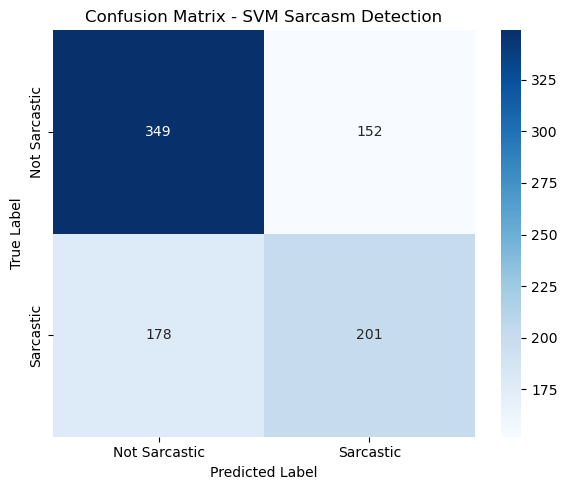

In [ ]:
# Load test data, model, and vectorizer
test_df = pd.read_csv("../Dataset/test_data2.csv")
X_test = test_df['input_text']
y_test = test_df['label']

vectorizer = joblib.load("../Dataset/temp/tfidf_vectorizer2.joblib")
svm = joblib.load("../Dataset/temp/svm_model2.joblib")

# Transform test data and predict
X_test_vec = vectorizer.transform(X_test)
y_pred = svm.predict(X_test_vec)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Sarcastic', 'Sarcastic']

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Sarcasm Detection')
plt.tight_layout()
plt.show()